In [1]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import scipy.interpolate as itp
import matplotlib as mpl

mpl.rcParams['text.usetex'] = True
cc = np.loadtxt("./current_constraints/ethos_n0_free_streaming_kids+planck_95%_xi_vs_loga.csv", delimiter=",", dtype=float)

def draw_2d_plot (params_global, params_both, file1, file2):
    # xs_global = np.linspace(-2, -0.4, 100)
    # ys_global = np.linspace(-6, 5, 100)
    min_x_2 = np.min(file2['xs'][:,0])
    max_x_2 = np.max(file2['xs'][:,-1])
    min_y_2 = np.min(file2['ys'][:,0])
    max_y_2 = np.max(file2['ys'][:,-1])
    xs_global = np.linspace(min_x_2, max_x_2, 100)
    ys_global = np.linspace(min_y_2, max_y_2, 100)

    fig, axs = plt.subplots(1, 2)
    handles_1 = []
    handles_2 = []
    axs[0].plot(cc[:,1], np.log10(cc[:,0]), linestyle="dashed", linewidth=2, color="black", zorder=7)
    axs[1].plot(cc[:,1], np.log10(cc[:,0]), linestyle="dashed", linewidth=2, color="black", zorder=7)
    handles_1.append(mpl.lines.Line2D([0], [0], linestyle="dashed", color="black", lw=2, label="$\mathrm{Current\;constraint}$"))
    handles_2.append(mpl.lines.Line2D([0], [0], linestyle="dashed", color="black", lw=2, label="$\mathrm{Current\;constraint}$"))

    for i, likelihood in enumerate(file1['likelihoods']):
        x = file1['xs'][i]
        y = file1['ys'][i]
        interp = itp.interp2d(y, x, likelihood)
        interpd_lkl = interp(ys_global, xs_global)
        axs[0].contourf(
            # file1['ys'][i],
            # file1['xs'][i],
            # likelihood,
            interpd_lkl,
            levels=file1['levels'][i],
            colors=[params_both['colours'][i]],
            # zorder=params_global['order'][i],
            alpha=params_global['alphas'][i],
            extent=file1['extents'][i]
        )
        axs[0].contour(
            # file1['ys'][i],
            # file1['xs'][i],
            # likelihood,
            interpd_lkl,
            levels=file1['levels'][i],
            colors=[params_both['colours'][i]],
            # zorder=params_global['order'][i]+1,
            # alpha=params_global['alphas'][i],
            extent=file1['extents'][i],
            linewidths=2
        )
        c1, c2, c3 = params_both['colours'][i]
        patch = mpatches.Patch(facecolor=(c1, c2, c3, params_global['alphas'][i]), edgecolor=(c1, c2, c3), label=params_both['names'][i])
        handles_1.append(patch)
    for i, likelihood in enumerate(file2['likelihoods']):
        x = file2['xs'][i]
        y = file2['ys'][i]
        interp = itp.interp2d(y, x, likelihood)
        interpd_lkl = interp(ys_global, xs_global)
        axs[1].contourf(
            # file2['ys'][i],
            # file2['xs'][i],
            # likelihood,
            interpd_lkl,
            levels=file2['levels'][i],
            colors=[params_both['colours'][i]],
            # zorder=params_global['order'][i],
            alpha=params_global['alphas'][i],
            extent=file2['extents'][i]
        )
        axs[1].contour(
            # file2['ys'][i],
            # file2['xs'][i],
            # likelihood,
            interpd_lkl,
            levels=file2['levels'][i],
            colors=[params_both['colours'][i]],
            # zorder=params_global['order'][i]+1,
            # alpha=params_global['alphas'][i],
            extent=file2['extents'][i],
            linewidths=2
        )
        c1, c2, c3 = params_both['colours'][i]
        patch = mpatches.Patch(facecolor=(c1, c2, c3, params_global['alphas'][i]), edgecolor=(c1, c2, c3), label=params_both['names'][i])
        handles_2.append(patch)

    fig.set_figheight(params_global['figsize'][0])
    fig.set_figwidth (params_global['figsize'][1])

    axs[0].legend(handles=handles_1, loc="lower left", fontsize=params_global['legendsize'])
    axs[0].set_xlabel(r"$\log_{10} (a_\mathrm{dark}/[\mathrm{Mpc}]^{-1})$", fontsize=params_global['fontsize'])
    axs[0].set_ylabel(r"$\log_{10}\xi_\mathrm{idr}$", fontsize=params_global['fontsize'])
    axs[0].set_xticks(params_global['xticks_location'], params_global['xticks_names'], fontsize=params_global['labelsize'])
    axs[0].set_xticks(params_global['xticks_minor'], minor=True)
    axs[0].set_yticks(params_global['yticks_location'], params_global['yticks_names'], fontsize=params_global['labelsize'])
    axs[0].set_yticks(params_global['yticks_minor'], minor=True)
    axs[0].set_ylim(params_global['yticks_location'][0], params_global['yticks_location'][-1])
    axs[0].set_xlim(params_global['xticks_location'][0], params_global['xticks_location'][-1])
    axs[0].tick_params(direction='in', which="both", right=True, top=True)
    axs[0].set_title("$\mathrm{Pessimistic\; Case}$", fontsize=params_global['titlesize'], pad=20)

    axs[1].legend(handles=handles_2, loc="lower left", fontsize=params_global['legendsize'])
    axs[1].set_xlabel(r"$\log_{10} (a_\mathrm{dark}/[\mathrm{Mpc}]^{-1})$", fontsize=params_global['fontsize'])
    axs[1].set_ylabel(r"$\log_{10}\xi_\mathrm{idr}$", fontsize=params_global['fontsize'])
    axs[1].set_xticks(params_global['xticks_location'], params_global['xticks_names'], fontsize=params_global['labelsize'])
    axs[1].set_xticks(params_global['xticks_minor'], minor=True)
    axs[1].set_yticks(params_global['yticks_location'], params_global['yticks_names'], fontsize=params_global['labelsize'])
    axs[1].set_yticks(params_global['yticks_minor'], minor=True)
    axs[1].set_ylim(params_global['yticks_location'][0], params_global['yticks_location'][-1])
    axs[1].set_xlim(params_global['xticks_location'][0], params_global['xticks_location'][-1])
    axs[1].tick_params(direction='in', which="both", right=True, top=True)
    axs[1].set_title("$\mathrm{Optimistic\; Case}$", fontsize=params_global['titlesize'], pad=20)

    axs[0].tick_params(length=8)
    axs[0].tick_params(length=4, which="minor")
    axs[1].tick_params(length=8)
    axs[1].tick_params(length=4, which="minor")

    fig.savefig(params_both['save_file_path'], bbox_inches = "tight")

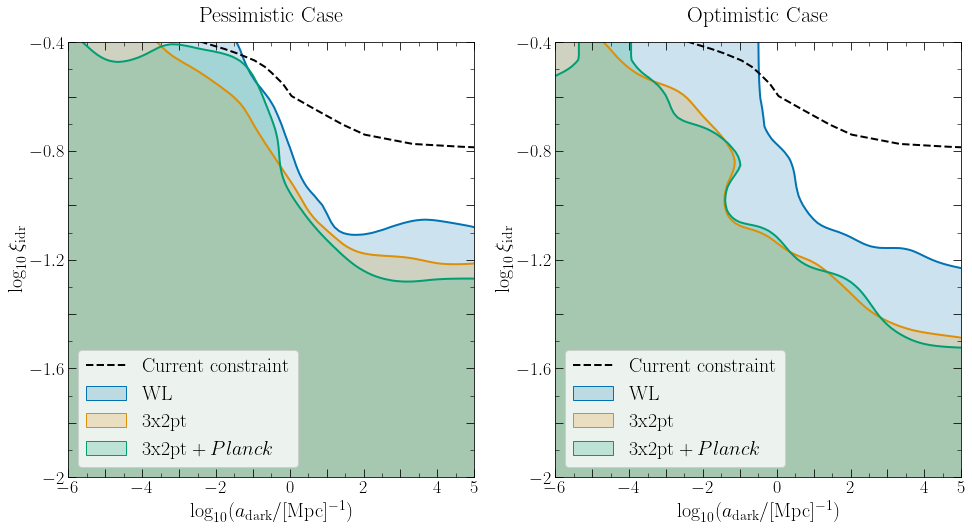

In [2]:
params_global = {
    'figsize':          (8,16),
    'fontsize':         20,
    'labelsize':        18,
    'legendsize':       20,
    'titlesize':        22,
    'alphas':           [0.2, 0.2, 0.2],
    'order':            [1, 2, 3],
    'xticks_location':  [-6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5],
    'xticks_names':     ["$-6$", "", "$-4$", "", "$-2$", "", "$0$", "", "$2$", "", "$4$", "$5$"],
    'xticks_minor':     np.linspace(-6, 5, 23),
    'yticks_location':  [-2, -1.8, -1.6, -1.4, -1.2, -1.0, -0.8, -0.6, -0.4],
    'yticks_names':     ["$-2$", "", "$-1.6$", "", "$-1.2$", "", "$-0.8$", "", "$-0.4$"],
    'yticks_minor':     np.linspace(-2, -0.4, 17),
}

params_both = {
    'save_file_path':   './ethos/probe comparison.pdf',
    'colours':          [
            (0.00392156862745098, 0.45098039215686275, 0.6980392156862745), 
            (0.8705882352941177, 0.5607843137254902, 0.0196078431372549), 
            (0.00784313725490196, 0.6196078431372549, 0.45098039215686275)
        ],
    'names':            ['$\mathrm{WL}$', '$\mathrm{3x2pt}$', r'$\mathrm{3x2pt} + Planck$'],
}

filename_pess = "./posteriors/ethos/pess.npz"
loaded_file_pess = np.load(filename_pess)
likelihoods_pess = np.array(loaded_file_pess['lkl'])
likelihoods_pess[0,:,:20] = np.array(loaded_file_pess['lvl'])[0,1] * 0.9
likelihoods_pess[0,:10,:] = np.array(loaded_file_pess['lvl'])[0,1] * 0.9
likelihoods_pess[2,:20,:] = np.array(loaded_file_pess['lvl'])[2,1] * 0.9
file_pess = {
    'xs': np.array(loaded_file_pess['x']),
    'ys': np.array(loaded_file_pess['y']),
    'likelihoods': likelihoods_pess,
    'levels': np.array(loaded_file_pess['lvl']),
    'extents': loaded_file_pess['exts']
}

filename_opt = "./posteriors/ethos/opt.npz"
loaded_file_opt = np.load(filename_opt)
likelihoods_opt = np.array(loaded_file_opt['lkl'])
likelihoods_opt[0,:,:30] = np.array(loaded_file_opt['lvl'])[0,1] * 0.9
file_opt = {
    'xs': np.array(loaded_file_opt['x']),
    'ys': np.array(loaded_file_opt['y']),
    'likelihoods': likelihoods_opt,
    'levels': np.array(loaded_file_opt['lvl']),
    'extents': loaded_file_opt['exts']
}

draw_2d_plot (params_global, params_both, file_pess, file_opt)

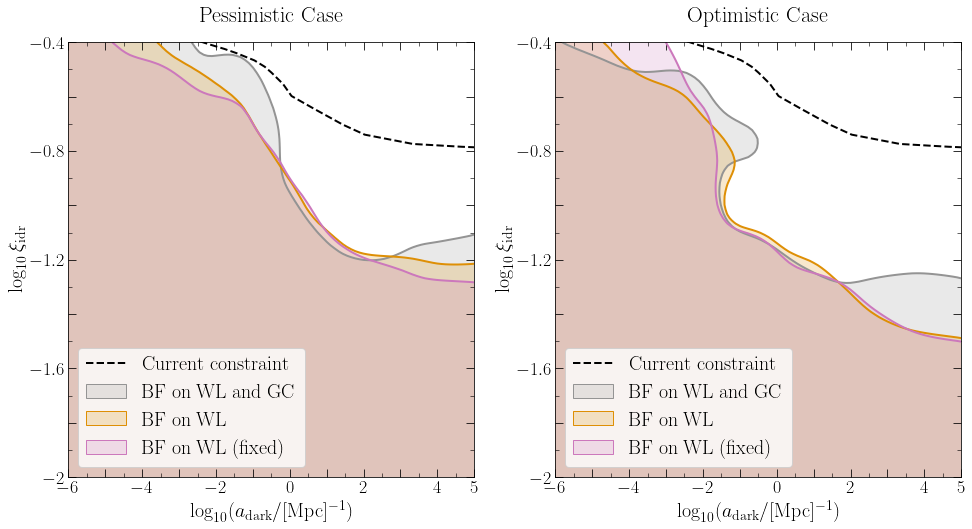

In [3]:
params_both = {
    'save_file_path':   './ethos/BF comparison.pdf',
    # 'colours':          ['#a65628', '#ff7f00', '#984ea3'],
    'colours':          [
        (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
        (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
        (0.8, 0.47058823529411764, 0.7372549019607844),
    ],
    'names':            [r'$\mathrm{BF\;on\;WL\;and\;GC}$', r'$\mathrm{BF\;on\;WL}$', r'$\mathrm{BF\;on\;WL\;(fixed)}$'],
}

filename_pess = "./posteriors/ethos/pess_BF_comparison.npz"
loaded_file_pess = np.load(filename_pess)
file_pess = {
    'xs': np.array(loaded_file_pess['x']),
    'ys': np.array(loaded_file_pess['y']),
    'likelihoods': np.array(loaded_file_pess['lkl']),
    'levels': np.array(loaded_file_pess['lvl']),
    'extents': loaded_file_pess['exts']
}

filename_opt = "./posteriors/ethos/opt_BF_comparison.npz"
loaded_file_opt = np.load(filename_opt)
file_opt = {
    'xs': np.array(loaded_file_opt['x']),
    'ys': np.array(loaded_file_opt['y']),
    'likelihoods': np.array(loaded_file_opt['lkl']),
    'levels': np.array(loaded_file_opt['lvl']),
    'extents': loaded_file_opt['exts']
}

draw_2d_plot (params_global, params_both, file_pess, file_opt)